# Aluno Giseldo da Silva

Fonte: https://medium.com/data-hackers/engenharia-de-features-transformando-dados-categ%C3%B3ricos-em-dados-num%C3%A9ricos-e5d3991df715

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn import svm
from sklearn import tree

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import matthews_corrcoef, make_scorer, f1_score, accuracy_score

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados e Tratamento dos dados com dummy nas variáveis categóricas

In [2]:
df = pd.read_csv("train.csv") 
df_test_real = pd.read_csv("test_real.csv") 

qtd_treino = df.count()[0]

junta_tudo = [df, df_test_real]
df = pd.concat(junta_tudo,  ignore_index=True)
qtd_total = df.count()[0]

df = df.drop(["ano", "sequencial_candidato", "nome"], axis=1) # apagando colunas que não auxiliam na predição
df = pd.get_dummies(df, columns = ["uf", "partido", "cargo", "sexo", "grau", "estado_civil", "ocupacao"])  # lidando com as variaveis categoricas

# retornando os datasets
df_test_real = df.loc[qtd_treino:qtd_total]
df = df.loc[0:qtd_treino-1]

train, test = train_test_split(df, train_size=0.8) # separação entre treino e teste  

train_y = train[["situacao"]]
train_X = train.drop(["situacao"], axis = 1)

test_y = test[["situacao"]]
test_X = test.drop(["situacao"], axis = 1)

le1 = LabelEncoder()
le1.fit(train_y.situacao)
train_y = le1.transform(train_y.situacao)

le2 = LabelEncoder()
le2.fit(test_y.situacao)
test_y = le2.transform(test_y.situacao)

In [3]:
df.groupby("situacao").size()

situacao
eleito        1026
nao_eleito    6596
dtype: int64

nao_eleito    6596
eleito        1026
Name: situacao, dtype: int64

Eleitos representam 13.4610% do dataset.



<AxesSubplot: xlabel='situacao', ylabel='count'>

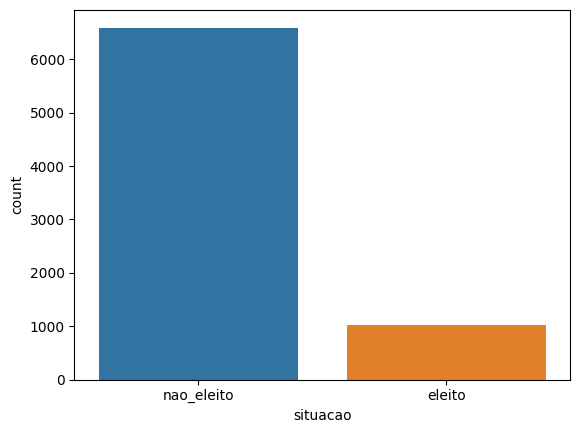

In [4]:
print(df.situacao.value_counts())
print("\nEleitos representam {:.4f}% do dataset.\n".format((df[df.situacao == "eleito"].shape[0] / df.shape[0]) * 100))
sns.countplot(df,x = 'situacao') # plotar gráfico de barras para as Classes

# Dados estão desbalanceados

### P: Há desbalanceamento das classes (isto é, uma classe tem muito mais instâncias que outra)? 
### R: Sim, Temos um dataset desbalanceado com mais classes do tipo "não eleito". mais ou menos 5 para 1, do que para o "eleito".

### P: Em que proporção? 
### R: Mais de 5 para 1, (eleito 1026 e nao_eleito 6596) ou seja a cada 1 eleito temos quase 6 não eleitos. Eleitos representam 13.4593% do dataset.

### P: Quais efeitos colaterais o desbalanceamento de classes pode causar no classificador?
### R: Alguns algoritmos de ML tem dificuldade em em induzir um bom modelo a partir de conjutos de dados desbalanceados. Se classificarmos com dados da classe desbalanceados, os algoritmos podem não diferenciar  a classe minoritária das demais categorias, acreditando que estão agregando resultado devido à aparente alta acurácia. Essa falta de diferenciação pode ocasionar problemas visto que geralmente a classe minoritária é o cerne da questão, como no nosso caso, quem foi eleito.

### P: Como você poderia tratar isso? (10 pt.)
### R: Pode ser utilizado as técnicas de "Reestruturação dos dados". Dentro das ténicas de "Reestruturação de dados" pode ser feito o "Undersamplig", que é reduzir a distribuição dos dados das observações da classe majoritária, para tentar igualar a quantidade. Isso pode ser feito com "Random Undersamplig", que é a retirada aleatória de observações da classe majoritária, ou "Fusão" que é unir duas ou mais observações da classe majoritária para uma menor perda de informação. Outra forma é o Oversampling consite em criar novas observações da classe minoritária com o objetivo de igualar a proporção das categorias. Outra opção é escolher um algoritmo mais resilente, coletar mais dados e usar modelos penalizados ou utilizar outras métricas para treino.

Fonte: https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b


### 2 - Treine: 
### P: 2.1 - um modelo de regressão logística 
### R: Treinado
### 2.2 - uma árvore de decisão
### R: Treinado
### 2.3 - um modelo de adaboost
### R: Treinado
### 2.4 - um modelo de random forest e 
### R: Treinado
### 2.5 - um modelo de gradient boosting.  
### R: Treinado
### 2.6 - Tune esses modelos usando validação cruzada e controle overfitting se necessário, considerando as particularidades de cada modelo.  (10 pts.)

# Antes do balanceamento

In [5]:
# Regressão Logistica
clf = LogisticRegression()
clf.fit(train_X, train_y)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["LR_Treino"])
extracted_col = resultado_df["LR_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["LR_Test"])
extracted_col2 = resultado_df2["LR_Test"]

resultado_df = resultado_df.join(extracted_col2)

# Decision Tree
clf = tree.DecisionTreeClassifier()
clf.fit(train_X, train_y)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_DT = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["DT_Treino"])
extracted_col = resultado_df_DT["DT_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_DT2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["DT_Test"])
extracted_col2 = resultado_df_DT2["DT_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(train_X, train_y)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_RF = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["AB_Treino"])
extracted_col = resultado_df_RF["AB_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_RF2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["AB_Test"])
extracted_col2 = resultado_df_RF2["AB_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

# Random Forest
clf = RandomForestClassifier()
clf.fit(train_X, train_y)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_RF = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["RF_Treino"])
extracted_col = resultado_df_RF["RF_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_RF2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["RF_Test"])
extracted_col2 = resultado_df_RF2["RF_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

# Gradient Boosting
clf = GradientBoostingClassifier()
clf.fit(train_X, train_y)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_GB = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["GB_Treino"])
extracted_col = resultado_df_GB["GB_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_GB2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["GB_Test"])
extracted_col2 = resultado_df_GB2["GB_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

# SVM
clf = svm.SVC()
clf.fit(train_X, train_y)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_GB = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["SVM_Treino"])
extracted_col = resultado_df_GB["SVM_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_GB2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["SVM_Test"])
extracted_col2 = resultado_df_GB2["SVM_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

resultado_df

c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,LR_Treino,LR_Test,DT_Treino,DT_Test,AB_Treino,AB_Test,RF_Treino,RF_Test,GB_Treino,GB_Test,SVM_Treino,SVM_Test
Precision,0.814095,0.809567,1.0,0.780135,0.845310,0.822788,1.0,0.809313,0.894791,0.817316,0.831658,0.809333
Recall,0.721276,0.717364,1.0,0.771103,0.840646,0.818903,1.0,0.803096,0.889458,0.800616,0.785320,0.754038
F-Measure,0.755916,0.751481,1.0,0.775499,0.842954,0.820827,1.0,0.806154,0.892097,0.808613,0.805886,0.777543
None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### P: 3 - Reporte precision, recall e f-measure no treino e validação. Há uma grande diferença de desempenho no treino/validação? Como você avalia os resultados? Justifique sua resposta. (10 pt.)
### R: Sim há uma boa diferença, porém analisando os dados percebe-se que no treino os modelos DecisionTree e RandomForest no treino apontam 1.0 para precision, recall e f-score, apontando o paradoxo da acurrácia por causa do desbalanceamento das classes. Não levando em consideração este fato o modelo Gradient Boost, conforme graficos abaixos e tabela acima é o modelo que teve melhores indicadores (precision e f-score) nos dados de teste entre os modelos. 

<AxesSubplot: >

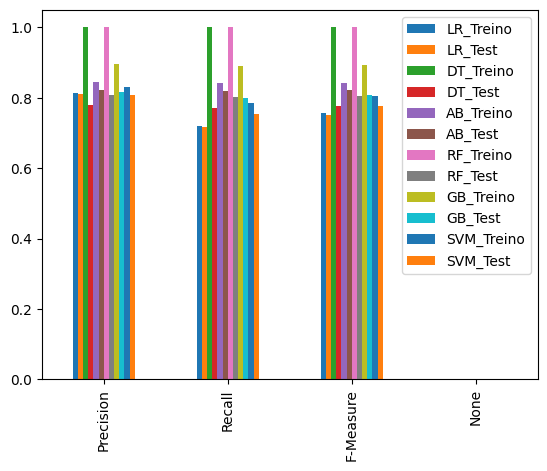

In [6]:
resultado_df.plot.bar()

## No treino para dados desbalanceados

<AxesSubplot: title={'center': ' Desbalanceados - Precisão no Treino'}>

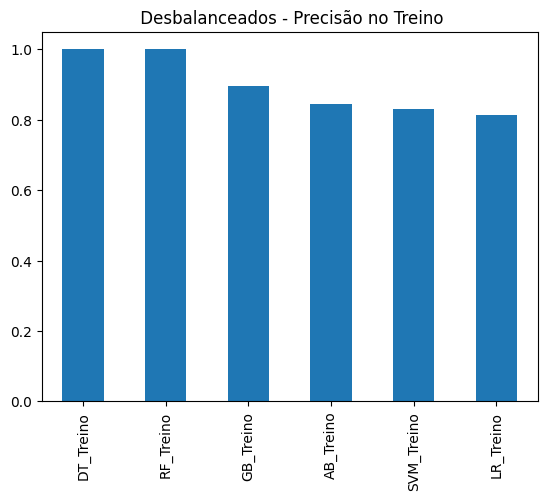

In [7]:
resultado_df.loc["Precision", ["LR_Treino", "DT_Treino", "AB_Treino", "RF_Treino", "GB_Treino", "SVM_Treino"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - Precisão no Treino")

### Decision Tree e Randon Forest foram melhores na métrica "Precisão" mas isso pode ser efeito do "paradoxo da acurácia" por causa dos dados desbalanceados no Treino

<AxesSubplot: title={'center': ' Desbalanceados - Recall no Treino'}>

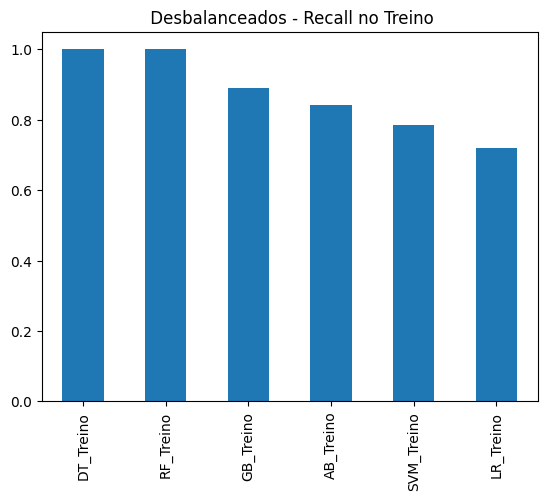

In [8]:
resultado_df.loc["Recall", ["LR_Treino", "DT_Treino", "AB_Treino", "RF_Treino", "GB_Treino", "SVM_Treino"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - Recall no Treino")

### Decision Tree e Randon Forest foram melhores na métrica "Recall" mas isso pode ser efeito do "paradoxo da acurácia" por causa dos dados desbalanceados no Treino

<AxesSubplot: title={'center': ' Desbalanceados - F-Measure no Treino'}>

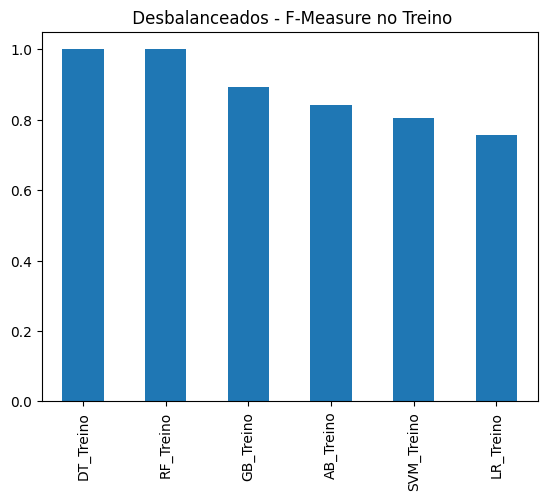

In [9]:
resultado_df.loc["F-Measure", ["LR_Treino", "DT_Treino", "AB_Treino", "RF_Treino", "GB_Treino", "SVM_Treino"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - F-Measure no Treino")

### Decision Tree e Randon Forest foram melhores na métrica "F-Measure" mas isso pode ser efeito do "paradoxo da acurácia" por causa dos dados desbalanceados no Treino

## No teste para dados desbalanceados

<AxesSubplot: title={'center': ' Desbalanceados - Precisão no Teste'}>

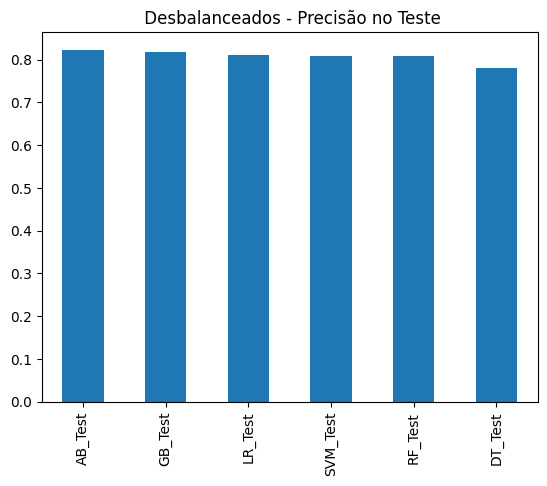

In [10]:
resultado_df.loc["Precision", ["LR_Test", "DT_Test", "AB_Test", "RF_Test", "GB_Test", "SVM_Test"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - Precisão no Teste")

### Logist Regression foi melhor para "Precision" para os dados desbalanceados no Teste

<AxesSubplot: title={'center': ' Desbalanceados - Recall no Teste'}>

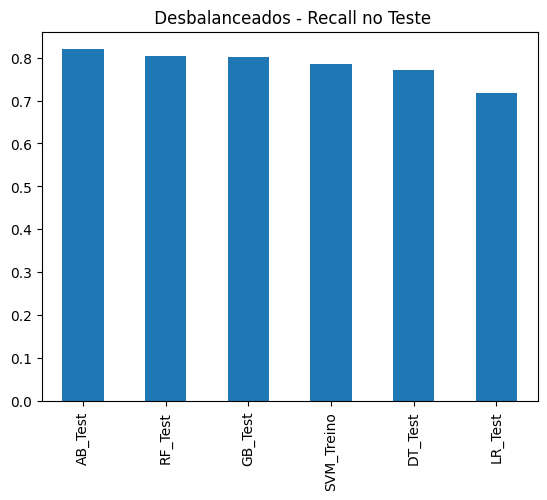

In [11]:
resultado_df.loc["Recall", ["LR_Test", "DT_Test", "AB_Test", "RF_Test", "GB_Test", "SVM_Treino"]].sort_values(ascending = False).plot.bar(title = " Desbalanceados - Recall no Teste")

### Gradient Boost foi melhor no Teste para "Recall" para os dados desbalanceados no Teste

<AxesSubplot: title={'center': 'Desbalanceados - F-Measure no Teste'}>

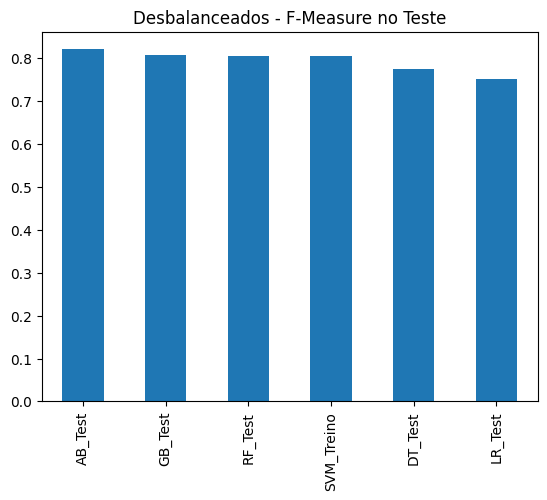

In [12]:
resultado_df.loc["F-Measure", ["LR_Test", "DT_Test", "AB_Test", "RF_Test", "GB_Test", "SVM_Treino"]].sort_values(ascending = False).plot.bar(title = "Desbalanceados - F-Measure no Teste")

### Gradient Boost foi melhor no Teste para "F-Measure" para os dados desbalanceados no Teste

### P: 4 - Interprete as saídas dos modelos. Quais atributos parecem ser mais importantes de acordo com cada modelo? (10 pts.)
### R: Com os dados desbalanceados temos no treino o efeito do "paradoxo da acurácia". Os dados são inconclusivos dado o desbalanceamento que fez com que os modelos DT e RF tivesse precisão máxima.
### TODO: OS Atributos tem que ser idenficados

## P: 6 - Experimente outros modelos (e.g. SVM, RandomForests e GradientBoosting).
## R: Os 3 modelos já foram utilizados vide acima

<AxesSubplot: >

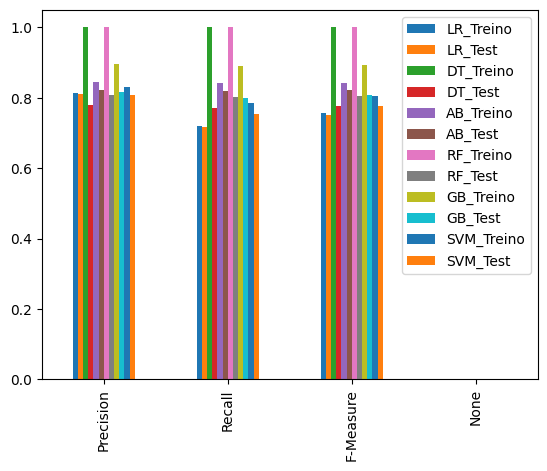

In [13]:
resultado_df.plot.bar()

# Depois do balanceamento

### 7 - Experimente balancear as classes,  caso estejam desbalanceadas.
### R: Foi realizado o Balanceamento com "Under-Sampling" da coluna "situacao" conforme resultados reportados abaixo.
### Balenceamento das classe: Under-Sampling

0    816
1    816
dtype: int64


<AxesSubplot: ylabel='count'>

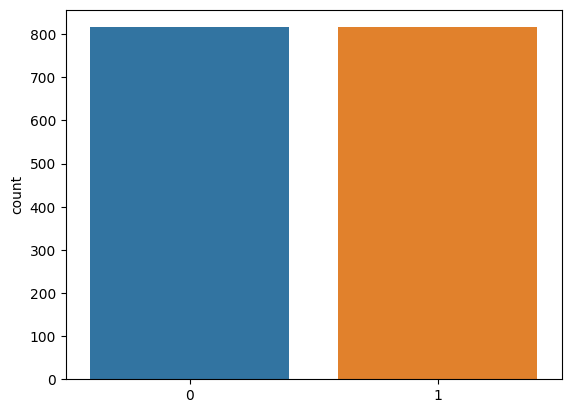

In [14]:
rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(train_X, train_y)
print(pd.Series(y_res).value_counts())
sns.countplot(x=y_res)

In [15]:
# Regressão Logística
clf = LogisticRegression()
clf.fit(x_res, y_res)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["LR_Treino"])
extracted_col = resultado_df["LR_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["LR_Test"])
extracted_col2 = resultado_df2["LR_Test"]

resultado_df = resultado_df.join(extracted_col2)

# Decision Tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_res, y_res)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_DT = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["DT_Treino"])
extracted_col = resultado_df_DT["DT_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_DT2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["DT_Test"])
extracted_col2 = resultado_df_DT2["DT_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

# AdaBoost
clf = AdaBoostClassifier()
clf.fit(x_res, y_res)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_RF = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["AB_Treino"])
extracted_col = resultado_df_RF["AB_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_RF2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["AB_Test"])
extracted_col2 = resultado_df_RF2["AB_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

# Random Forest
clf = RandomForestClassifier()
clf.fit(x_res, y_res)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_RF = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["RF_Treino"])
extracted_col = resultado_df_RF["RF_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_RF2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["RF_Test"])
extracted_col2 = resultado_df_RF2["RF_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

# Gradient Boost
clf = GradientBoostingClassifier()
clf.fit(x_res, y_res)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_GB = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["GB_Treino"])
extracted_col = resultado_df_GB["GB_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_GB2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["GB_Test"])
extracted_col2 = resultado_df_GB2["GB_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

# SVM
clf = svm.SVC()
clf.fit(x_res, y_res)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_GB = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["SVM_Treino"])
extracted_col = resultado_df_GB["SVM_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_GB2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["SVM_Test"])
extracted_col2 = resultado_df_GB2["SVM_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

resultado_df


c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,LR_Treino,LR_Test,DT_Treino,DT_Test,AB_Treino,AB_Test,RF_Treino,RF_Test,GB_Treino,GB_Test,SVM_Treino,SVM_Test
Precision,0.695343,0.695866,0.795011,0.746633,0.768106,0.751294,0.788747,0.760985,0.784380,0.767689,0.765530,0.767188
Recall,0.871535,0.868224,0.946317,0.865073,0.916021,0.883840,0.943477,0.901648,0.935038,0.899448,0.898830,0.889824
F-Measure,0.715866,0.714474,0.842714,0.783649,0.811972,0.790481,0.836129,0.802284,0.830716,0.808874,0.807357,0.807018
None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

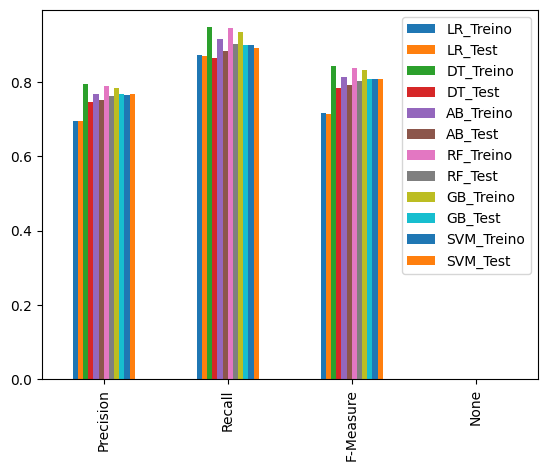

In [16]:
resultado_df.plot.bar()

### R: Ao se realizar o balanceamento da feature situacao, o modelo de decision Tree não está mais apontando o "paradoxo da acurrácia" de antes. Logo a comparação dos modelos está mais precisa.

<AxesSubplot: title={'center': 'Precision Treino'}>

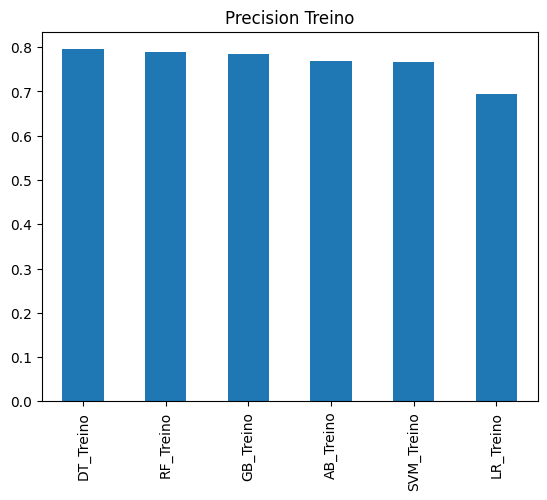

In [17]:
resultado_df.loc["Precision", ["LR_Treino", "DT_Treino", "AB_Treino", "RF_Treino", "GB_Treino", "SVM_Treino"]].sort_values(ascending = False).plot.bar(title = "Precision Treino")

Randon Forest no Treino teve uma melhor Precisão nos dados do Treino depois do balanceamento.

<AxesSubplot: title={'center': 'Recall Treino'}>

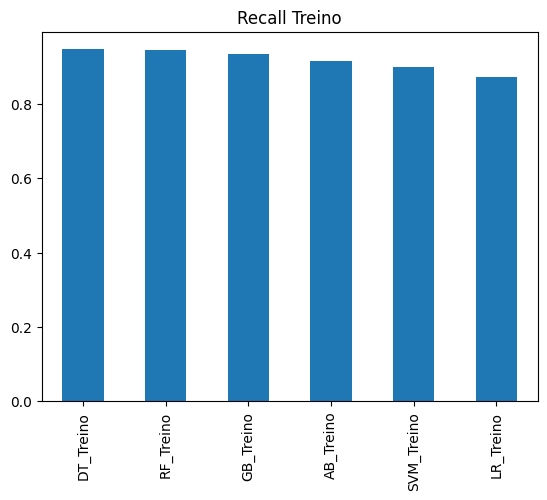

In [18]:
resultado_df.loc["Recall", ["LR_Treino", "DT_Treino", "AB_Treino", "RF_Treino", "GB_Treino", "SVM_Treino"]].sort_values(ascending = False).plot.bar(title = "Recall Treino")

Randon Forest teve melhor recall no Treino depois do balanceamento depois do balanceamento.

<AxesSubplot: title={'center': 'F-Measure Treino'}>

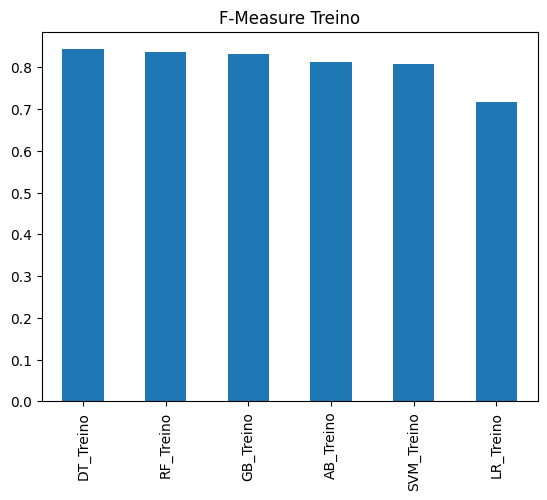

In [19]:
resultado_df.loc["F-Measure", ["LR_Treino", "DT_Treino", "AB_Treino", "RF_Treino", "GB_Treino", "SVM_Treino"]].sort_values(ascending = False).plot.bar(title = "F-Measure Treino")

Randon Forest teve melhor F-Measure no Treino depois do balanceamento.

<AxesSubplot: title={'center': 'Precision Teste'}>

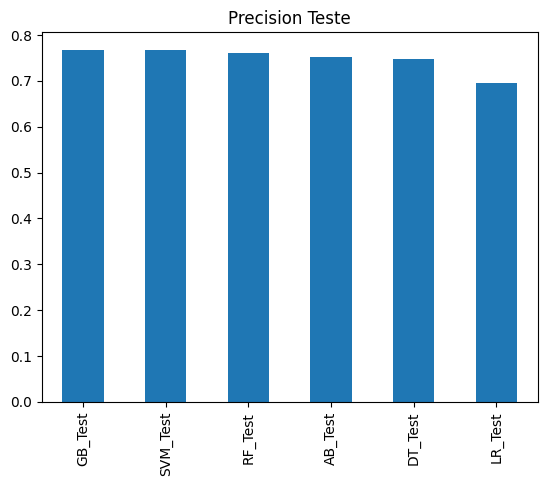

In [20]:
resultado_df.loc["Precision", ["LR_Test", "DT_Test", "AB_Test", "RF_Test", "GB_Test", "SVM_Test"]].sort_values(ascending = False).plot.bar(title = "Precision Teste")

Gradient Boost Teve o melhor resultado para a métrica Precision nos dados do Teste depois do balanceamento.

<AxesSubplot: title={'center': 'Recall no Teste'}>

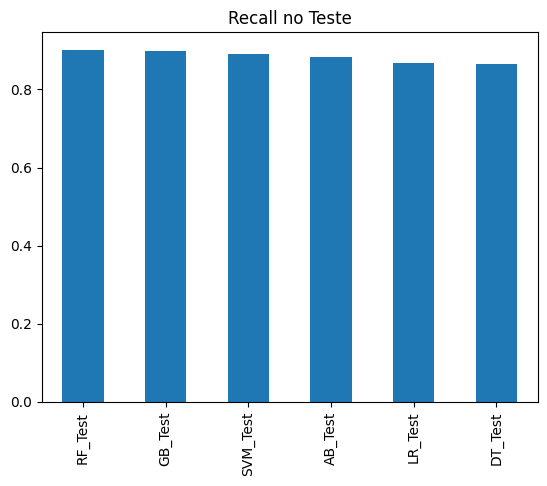

In [21]:
resultado_df.loc["Recall", ["LR_Test", "DT_Test", "AB_Test", "RF_Test", "GB_Test", "SVM_Test"]].sort_values(ascending = False).plot.bar(title = "Recall no Teste")

Gradient Boost teve um melhor resultado no Test para Recall nos dados do Teste depois do balanceamento.

<AxesSubplot: title={'center': 'F-measure no Teste'}>

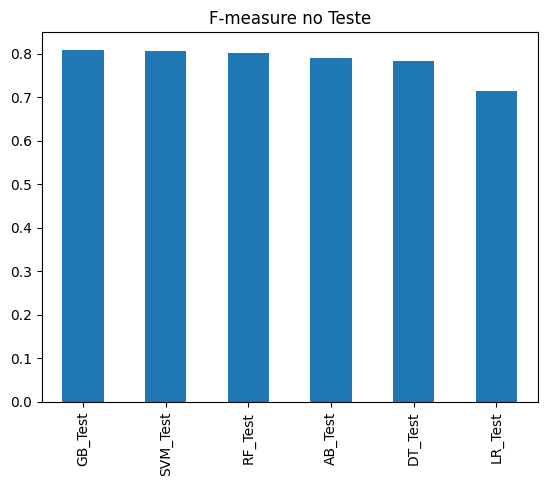

In [22]:
resultado_df.loc["F-Measure", ["LR_Test", "DT_Test", "AB_Test", "RF_Test", "GB_Test", "SVM_Test"]].sort_values(ascending = False).plot.bar(title = "F-measure no Teste")

### 4 - Interprete as saídas dos modelos. Quais atributos parecem ser mais importantes de acordo com cada modelo? (10 pts.)
### Depois do Balanceamento: "Randon Forest" no "Treino" teve uma melhor Precisão, Recall e F-Measure. Já "Gradient Boost" teve melhor Precisão, Recall e F-Measure no "Test".

### 5 - Envie seus melhores modelos conforme resultados nos dados de teste. Sugestões para melhorar o modelo: (10 pts.)
### R: O Melhor modelo é o Decision Tree no Treino e o SVM no Test, depois do balanceamento, conforme tabela abaixo. 
  ### R: Sugestão 1: Uma sugestão para melhorar o modelo é no lugar de utilizar dummies, utilizar one-hot enconding e compara o resultado.
  ### R: Sugestão 2: Uma sugestão é normalizar as features preditoras.

### R: Logo o Gradient Boost teve o melhor resultado para o F-Measure nos dados do Teste depois do balanceamento, portanto sendo o algoritmo escolhido.

### Resultado do Melhor Modelo, Gradient Boost com todos os dados para gerar os resultados da submissão

In [26]:
# treinando o modelo com todos os dados
train_y_final = df[["situacao"]]
train_X_final = df.drop(["situacao"], axis = 1)

train_y_final_values = train_y_final.values
test_X_final = df_test_real.drop(["situacao"], axis = 1)

In [27]:
clf = GradientBoostingClassifier()
clf.fit(train_X_final, train_y_final_values)
y_pred_test_final = clf.predict(test_X_final)

c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Gerando o arquivo result submission com o resultado da predição dos anos de 2014

In [36]:
df_test_real__ = pd.read_csv("test_real.csv") 
solution = pd.DataFrame({"ID": df_test_real__.sequencial_candidato,"Predicted": y_pred_test_final})
solution.to_csv("result_submission.csv", index=False)

Validação Cruzada



In [53]:
clf = GradientBoostingClassifier()
clf.fit(train_X_final, train_y_final_values.ravel())
y_pred_test_final = clf.predict(test_X_final)

In [58]:
results = []
names = []
media = []

model = GradientBoostingClassifier()
cv_results = cross_validate (model, train_X_final, train_y_final_values.ravel(), cv = 10)

cv_results

{'fit_time': array([4.05405951, 3.7947042 , 3.83934641, 3.7743268 , 3.73999882,
        3.70507574, 3.71299601, 3.72682428, 4.05300522, 3.95801759]),
 'score_time': array([0.00499988, 0.00699401, 0.00499988, 0.00600219, 0.00696921,
        0.00700307, 0.00499964, 0.00596905, 0.00799584, 0.00600314]),
 'test_score': array([0.90301442, 0.90825688, 0.90288714, 0.9160105 , 0.88451444,
        0.8832021 , 0.91994751, 0.91469816, 0.88057743, 0.93700787])}

In [52]:
models = []
models.append(("LogisticRegression", LogisticRegression()))
models.append(("DecisionTreeClassifier", tree.DecisionTreeClassifier()))
models.append(("AdaBoostClassifier", AdaBoostClassifier()))
models.append(("RandomForestClassifier", RandomForestClassifier()))
models.append(("GradientBoostingClassifier", GradientBoostingClassifier()))
models.append(("SVM", svm.SVC()))

num_folds = 10

results = []
names = []
media = []

for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = -cross_val_score(model, train_X_final, train_y_final_values, cv = kfold)
    results.append(cv_results)
    media.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when

LogisticRegression: -0.899775 (0.033548)
DecisionTreeClassifier: -0.895443 (0.029421)


c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConve

AdaBoostClassifier: -0.913416 (0.025718)


c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\gigi\AppData\Local\Programs\Python

RandomForestClassifier: -0.913812 (0.026195)


c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A colu

GradientBoostingClassifier: -0.913942 (0.026625)


c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConve

SVM: -0.909090 (0.028654)
